# Project 2. Explain different categories of representation and reasoning tasks

Here are seven Python code examples, each focusing on a different category of representation and reasoning tasks:

1. Semantic Networks:
Semantic networks represent knowledge using nodes and edges to capture relationships. The example below demonstrates a simple semantic network using the networkx library:

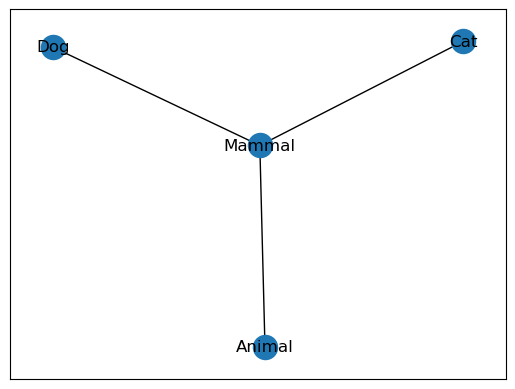

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty semantic network
semantic_network = nx.Graph()

# Add nodes (concepts)
semantic_network.add_nodes_from(["Cat", "Dog", "Mammal", "Animal"])

# Add edges (relationships)
semantic_network.add_edges_from([("Cat", "Mammal"), ("Dog", "Mammal"), ("Mammal", "Animal")])

# Visualize the semantic network
nx.draw_networkx(semantic_network, with_labels=True)
plt.show()


2. Frames:
Frames provide a structured way to represent knowledge. The example below demonstrates a simple frame representation using dictionaries in Python:

In [2]:
# Define a frame for a person
person_frame = {
    "name": "John Doe",
    "age": 30,
    "occupation": "Engineer"
}

# Access frame attributes
print("Name:", person_frame["name"])
print("Age:", person_frame["age"])
print("Occupation:", person_frame["occupation"])


Name: John Doe
Age: 30
Occupation: Engineer


3. Rules and Logic:
Rule-based systems use logical rules for knowledge representation and reasoning. The example below demonstrates a basic rule-based system using the pyknow library:

In [32]:
from sympy.logic.boolalg import Implies, And, Or
from sympy.abc import A, B, C

# Define logical rules
rule1 = Implies(And(A, B), C)
rule2 = Implies(A, B)
rule3 = Implies(B, C)

# Define facts
facts = {A: True, B: False}

# Apply logical rules to derive conclusions
conclusion1 = rule1.subs(facts)
conclusion2 = rule2.subs(facts)
conclusion3 = rule3.subs(facts)

# Print the conclusions
print("Conclusion 1:", conclusion1)
print("Conclusion 2:", conclusion2)
print("Conclusion 3:", conclusion3)




Conclusion 1: True
Conclusion 2: False
Conclusion 3: True


4. Knowledge Graphs:
Knowledge graphs represent knowledge as a graph structure. The example below demonstrates a simple knowledge graph using the rdflib library:

In [18]:
from rdflib import Graph, Literal, RDF, RDFS, URIRef
from SPARQLWrapper import SPARQLWrapper, JSON

# Create a knowledge graph
knowledge_graph = Graph()

# Add triples to the graph
knowledge_graph.add((URIRef("http://example.org/Dog"), RDF.type, URIRef("http://example.org/Animal")))
knowledge_graph.add((URIRef("http://example.org/Dog"), RDFS.subClassOf, URIRef("http://example.org/Mammal")))

# Convert the graph to RDF/XML format
graph_data = knowledge_graph.serialize(format="xml")

# Create a SPARQLWrapper instance and set the graph data
sparql = SPARQLWrapper("https://dbpedia.org/sparql")
sparql.setQuery("""
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    SELECT ?subclass
    WHERE {
        ?subclass rdfs:subClassOf ?superclass .
        ?superclass rdfs:subClassOf ?topclass .
    }
""")
sparql.setReturnFormat(JSON)
sparql.setMethod('POST')
sparql.setRequestMethod('POSTDIRECTLY')
# sparql.setRDFGraph(graph_data)

# Execute the SPARQL query
query_results = sparql.query().convert()

# Process and print the query results
bindings = query_results["results"]["bindings"]
for binding in bindings:
    subclass = binding["subclass"]["value"]
    print(subclass)



http://www.w3.org/2002/07/owl#Restriction
http://www.w3.org/2002/07/owl#InverseFunctionalProperty
http://www.w3.org/2002/07/owl#SymmetricProperty
http://www.w3.org/2002/07/owl#TransitiveProperty
http://s.opencalais.com/1/type/er/Company
http://s.opencalais.com/1/type/er/Company
http://s.opencalais.com/1/type/er/Company
http://s.opencalais.com/1/type/er/Company
http://dbpedia.org/ontology/Company
http://dbpedia.org/ontology/Company
http://dbpedia.org/ontology/Company
http://dbpedia.org/ontology/Company
http://www.openlinksw.com/schemas/oplweb#ProductCategory
http://www.openlinksw.com/schemas/oplweb#ProductFormat
http://www.openlinksw.com/schemas/oplweb#ProductFormatCategory
http://www.openlinksw.com/schemas/oplweb#ProductFamilyFeature
http://www.openlinksw.com/schemas/oplweb#ProductFormatCategory
http://www.openlinksw.com/schemas/oplweb#ProductCategoryFeature
http://www.openlinksw.com/schemas/oplweb#ProductFormatCategory
http://www.openlinksw.com/schemas/oplweb#ProductFormatFeature
http

5. Ontologies:
Ontologies provide a formal representation of knowledge. The example below demonstrates ontology-based reasoning using the owlready2 library:

In [38]:
from owlready2 import *

# Load the ontology from an online source
onto = get_ontology("https://www.w3.org/TR/2003/PR-owl-guide-20031209/wine.rdf").load()

# Define classes and subclasses
class Wine(Thing):
    namespace = onto

class RedWine(Wine):
    namespace = onto

class WhiteWine(Wine):
    namespace = onto


6. Probabilistic Models:
Probabilistic models capture uncertainty in knowledge representation. The example below demonstrates probabilistic reasoning using the pgmpy library:

In [22]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import warnings
warnings.filterwarnings('ignore')

# Create a Bayesian Network
model = BayesianModel([('A', 'B'), ('C', 'B'), ('B', 'D')])

# Define Conditional Probability Distributions (CPDs)
cpd_a = TabularCPD(variable='A', variable_card=2, values=[[0.3], [0.7]])
cpd_c = TabularCPD(variable='C', variable_card=2, values=[[0.4], [0.6]])
cpd_b = TabularCPD(variable='B', variable_card=2, 
                   values=[[0.2, 0.3, 0.5, 0.4], [0.8, 0.7, 0.5, 0.6]],
                   evidence=['A', 'C'], evidence_card=[2, 2])
cpd_d = TabularCPD(variable='D', variable_card=2, values=[[0.6, 0.7], [0.4, 0.3]],
                   evidence=['B'], evidence_card=[2])

# Add CPDs to the model
model.add_cpds(cpd_a, cpd_c, cpd_b, cpd_d)

# Do probabilistic inference
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
query = inference.query(variables=['D'], evidence={'A': 1, 'C': 0})
print(query)


+------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.6500 |
+------+----------+
| D(1) |   0.3500 |
+------+----------+


7. Constraint Satisfaction:
Constraint satisfaction models represent knowledge using variables, domains, and constraints. The example below demonstrates constraint satisfaction using the python-constraint library:

In [24]:
from constraint import Problem

# Create a constraint satisfaction problem
problem = Problem()

# Define variables and domains
problem.addVariables(['x', 'y'], [1, 2, 3])

# Define constraints
problem.addConstraint(lambda x, y: x + y == 5, ('x', 'y'))

# Solve the problem
solutions = problem.getSolutions()

# Print solutions
for solution in solutions:
    print(solution)


{'x': 3, 'y': 2}
{'x': 2, 'y': 3}


These code examples illustrate how different categories of representation and reasoning tasks can be implemented in Python using various libraries and techniques. Each example demonstrates a specific category, providing a practical implementation that showcases the corresponding concepts and methodologies.